# Evaluation of tabu search implementation

In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
from gpbenchmarks import get_data


In [2]:
def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def plog(x):
    return np.log(x, out=np.copy(x), where=x>0)

def pow2(x):
    return x**2

def pow3(x):
    return x**3


funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)
funset.add(plog, 1)
funset.add(np.sin, 1)
funset.add(np.cos, 1)

#     function set: +, -, *, /, sin, cos, tan, tanh, sqrt, exp, log, **2, **3
ext_funset = tengp.FunctionSet()
ext_funset.add(np.add, 2)
ext_funset.add(np.subtract, 2)
ext_funset.add(np.multiply, 2)
ext_funset.add(pdivide, 2)
ext_funset.add(np.sin, 1)
ext_funset.add(np.cos, 1)
ext_funset.add(np.tan, 1)
ext_funset.add(np.tanh, 1)
ext_funset.add(np.sqrt, 1)
ext_funset.add(np.exp, 1)
ext_funset.add(plog, 1)
ext_funset.add(pow2, 1)
ext_funset.add(pow3, 1)

params1d = tengp.Parameters(2, 1, 1, 100, funset)
params2d = tengp.Parameters(3, 1, 1, 100, funset)
params5d = tengp.Parameters(6, 1, 1, 100, ext_funset)

functions = [('nguyenf4', params1d, [20, -1, 1]), ('nguyenf7', params1d, [20, 0, 2]), ('nguyenf10', params2d, [100, -1, 1]), ('korns12', params5d, [10000, -50, 50])]

In [3]:
trials = 100

# Single mutation, without tabu memory

In [5]:
# basically the same as previous, so just load results from pickle
import pickle

with open('../tabu_search_1/baseline', 'rb') as f:
    results = pickle.load(f)

# Single mutation, with tabu memory

In [7]:
%%time

random.seed(0)

ts_results = []

for function in functions:
    print(function[0])
    trial_results = []
    for trial in range(trials):
        print(trial, end=',')
        X, y = get_data(function[0], *function[2])
        X = np.c_[np.ones(len(X)), X]
        population = tengp.search.tabu_es(X, y, mean_squared_error, function[1], mutation='single', memory_size=1000)
        trial_results.append(population[0].fitness)
    ts_results.append(trial_results)
    print()
    

nguyenf4
0,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in multiply
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in sin
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in cos
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: Run

1,2,3,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in add
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
nguyenf7
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
nguyenf10
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
korns12
0,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in sqrt
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: overflow encountered in exp
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in power
  # This is added back by InteractiveShellApp.init_path()
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in tan
  current_node.value = current_node.fun(*values)


1,2,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  


3,4,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: overflow encountered in multiply
  current_node.value = current_node.fun(*values)


5,6,7,8,9,10,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


11,12,13,14,15,16,17,18,19,20,21,22,23,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in true_divide
  


39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
CPU times: user 37min 47s, sys: 3.83 s, total: 37min 50s
Wall time: 38min 12s


# Results

Overall statistics:

In [8]:
print(f'basic version, mean: {np.mean(results)}, median: {np.median(results)}')
print(f'ts version,    mean: {np.mean(ts_results)}, median: {np.median(ts_results)}')

basic version, mean: 0.2518620143135209, median: 0.010339049666977455
ts version,    mean: 0.22818239036336485, median: 0.011745249672253051


Performance per functions:

In [9]:
print('function\tbasic minimum\t\tbasic mean\t\tbasic median\t\ttabu search minimum\ttabu search mean\ttabu search median')
print('-'*158)
for res, ts_res, funs in zip(results, ts_results, functions):
    print(f'{funs[0]}\t{np.min(res)}\t{np.mean(res)}\t{np.median(res)}\t{np.min(ts_res)}\t{np.mean(ts_res)}\t{np.median(ts_res)}')

function	basic minimum		basic mean		basic median		tabu search minimum	tabu search mean	tabu search median
--------------------------------------------------------------------------------------------------------------------------------------------------------------
nguyenf4	1.6221144956601493e-32	0.08429064180411236	0.024172592894567156	1.1095763892100962e-32	0.05563121474806537	0.01769006375046512
nguyenf7	7.972663992315195e-05	0.006769250334646217	0.0015171674469303294	2.585560950339864e-32	0.012389990327919084	0.0015046948718136378
nguyenf10	0.0	0.028432839252535244	0.004680859429411596	9.39853812860971e-33	0.012463230823724677	0.005686035000458372
korns12	0.13705089014982166	0.8879553258627898	0.8435707105014949	0.19516162894855846	0.8322451255537502	0.8251415639123749


Hit counts (at least close to zero):

In [10]:
print('Hit count for basic single mutation {}'.format((np.array(results).flatten() <= 0.0001).sum()))
print('Hit count for ts single mutation {}'.format((np.array(ts_results).flatten() <= 0.0001).sum()))

Hit count for basic single mutation 21
Hit count for ts single mutation 21


Hit counts (equals to zero):

In [11]:
print('Hit count for basic single mutation {}'.format((np.array(results).flatten() == 0).sum()))
print('Hit count for ts single mutation {}'.format((np.array(ts_results).flatten() == 0).sum()))

Hit count for basic single mutation 4
Hit count for ts single mutation 0


Boxplots of results over all functions:

Text(0.5,1,'tabe search single mutation')

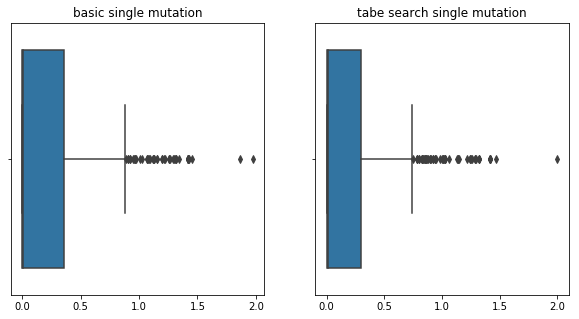

In [12]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(np.array(results).flatten(), ax=axs[0])
sns.boxplot(np.array(ts_results).flatten(), ax=axs[1])
axs[0].set_title('basic single mutation')
axs[1].set_title('tabe search single mutation')

Distributions of results over all functions

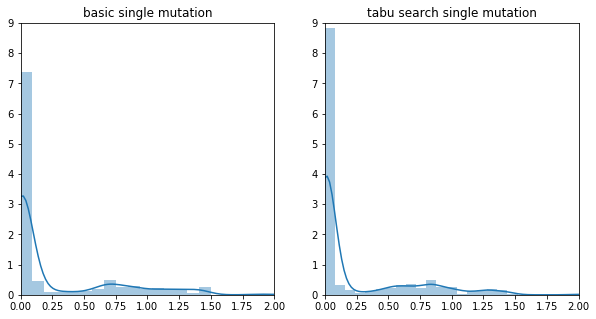

In [13]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))

#sns.distplot(np.array(pr_results).flatten(), ax=axs[0]); axs[0].set_xlim(0,1); axs[0].set_title('basic probabilistic mutation');
sns.distplot(np.array(results).flatten(), ax=axs[0]);
axs[0].set_title('basic single mutation');
axs[0].set_ylim(0,9)
axs[0].set_xlim(0,2)
sns.distplot(np.array(ts_results).flatten(), ax=axs[1]); 
axs[1].set_title('tabu search single mutation');
axs[1].set_xlim(0,2)
axs[1].set_ylim(0,9);